In [1]:
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

In [6]:
ddf=pd.read_csv(r'TrekHeight.csv',index_col=0)

ddf

,Region,Name,Height
167,KARJAT,Sankshi Fort,800.0
169,ROHA,Avchitgad,977.0
7,DHULE,Songir fort,997.0
174,ROHA,Songiri,1000.0
171,ROHA,Tala Fort,1000.0
...,...,...,...
48,IGATPURI,Mandan***,4841.0
49,IGATPURI,Alang***,4852.0
5,BAGLAN,Salota Fort,4986.0
4,BAGLAN,Salher Fort,5140.0


In [9]:
ddf['Name'] = ddf['Name'].str.replace('\*\*\*','',regex=True)
ddf

,Region,Name,Height
167,KARJAT,Sankshi Fort,800.0
169,ROHA,Avchitgad,977.0
7,DHULE,Songir fort,997.0
174,ROHA,Songiri,1000.0
171,ROHA,Tala Fort,1000.0
...,...,...,...
48,IGATPURI,Mandan,4841.0
49,IGATPURI,Alang,4852.0
5,BAGLAN,Salota Fort,4986.0
4,BAGLAN,Salher Fort,5140.0


In [ ]:
#pip install googletrans==3.1.0a0

In [10]:
from googletrans import Translator
import pandas as pd

# Create a translator object
translator = Translator()

# Get the Marathi translation of each name in the 'Name' column
ddf['Name_marathi'] = ddf['Name'].apply(lambda x: translator.translate(x, dest='mr').text)

# Print the updated DataFrame
print(ddf)


       Region            Name  Height        Name_marathi
167    KARJAT   Sankshi Fort    800.0      सांक्षी किल्ला
169      ROHA       Avchitgad   977.0             अवचितगड
7       DHULE     Songir fort   997.0  मोठ्याने विचार करा
174      ROHA         Songiri  1000.0             धन्यवाद
171      ROHA      Tala Fort   1000.0         किल्ला बोला
..        ...             ...     ...                 ...
48   IGATPURI          Mandan  4841.0                मंडण
49   IGATPURI           Alang  4852.0               विचार
5      BAGLAN     Salota Fort  4986.0       सालोटा किल्ला
4      BAGLAN     Salher Fort  5140.0      साल्हेर किल्ला
53     JUNNAR   Kalsubai Trek  5400.0       कळसूबाई ट्रेक

[163 rows x 4 columns]


In [2]:
ddf.to_excel("MarathiName.xlsx")

NameError: name 'ddf' is not defined

### Most of the names are not converted properly using google Translator so translating it using proper online tool for conversion.

In [3]:

ddf = pd.read_excel("CorrectedMarathiName.xlsx")
data = ddf.set_index('Name_marathi').to_dict()['Height']
print(data)

{' सांक्षी किल्ला': 800, 'अवचितगड': 977, 'सोनगीर किल्ला': 997, 'सोनगिरी': 1000, ' तळाचा किल्ला': 1000, ' सोंडाई किल्ला': 1200, 'इर्शाळगड किल्ला': 1213, ' घोसाळगड वीरगड': 1222, ' सागरगड किल्ला': 1357, 'सरसगड किल्ला': 1433, 'सुरगड किल्ला': 1507, 'तांदुळवाडी': 1524, ' कर्नाळा किल्ला': 1538, 'पेठ किल्ला - कोथळीगड किल्ला': 1550, 'कालदुर्ग': 1550, ' पेब किल्ला - विकटगड': 1564, 'भूपतगड': 1603, 'मंडणगड': 1606, 'अशेरीगड किल्ला': 1680, 'रसाळगड': 1767, 'बिरवाडी': 1799, 'अडसूळ': 1826, ' माणिकगड किल्ला': 1876, 'कोहोज किल्ला': 1889, 'लालींग किल्ला': 1945, 'गलना किल्ला': 1968, 'कलानंदीगड, पारगड': 2000, 'पदर किल्ला': 2002, 'तुंगी': 2019, 'कुर्डुगड': 2021, ' सुधागड किल्ला - भोरपगड': 2030, 'गोरखगड किल्ला': 2137, 'कवल्या': 2124, 'पालगड/पालदुर्गा': 2160, 'हरगापूरगड': 2250, 'गंभीरगड': 2252, 'चंद्रगड किल्ला - ढवळ्या - आर्थर सीट ट्रेल': 2257, 'कलावंतीण दुर्ग किल्ला': 2318, 'प्रबळगड किल्ला': 2318, 'ढाक बहिरी लेणी - भीमगड': 2320, 'भामेर किल्ला': 2443, 'मनसंतोष': 2460, 'मंगळगड/कांगोरी': 2465, 'कंक्राळा किल्ला':

In [6]:
url = "https://hindityping.info/download/assets/Hindi-Fonts-Unicode/gargi.ttf"

r = requests.get(url, allow_redirects=True)
font_path="gargi.ttf"

with open(font_path, "wb") as fw:
  fw.write(r.content)


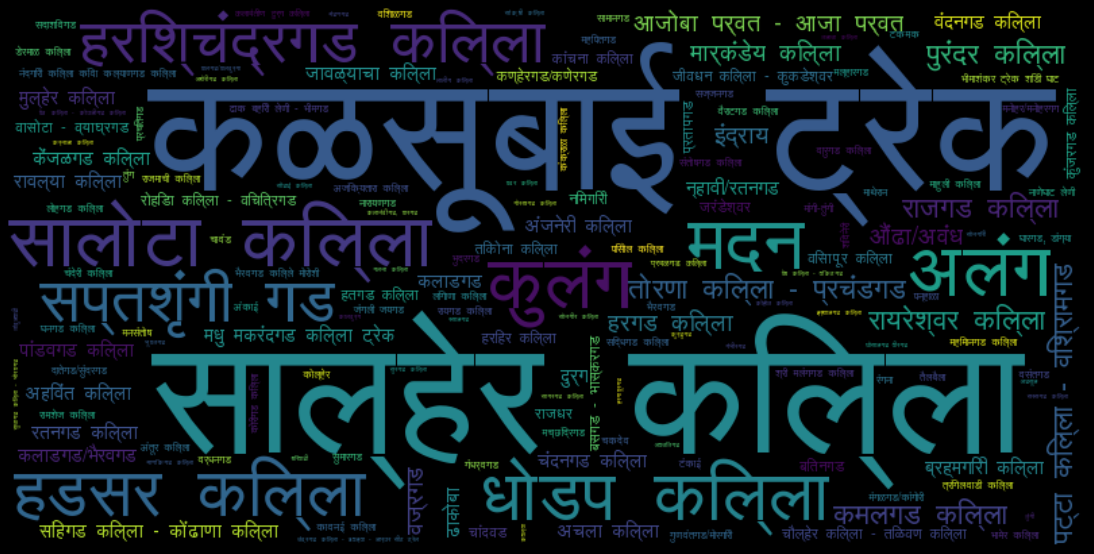

In [8]:

wc = WordCloud(width=800, height=400, max_words=400, font_path=font_path).generate_from_frequencies(data)
plt.figure(figsize=(15,13), facecolor="k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation='bilinear')
plt.show()

## This is another font rendering issue by the window OS


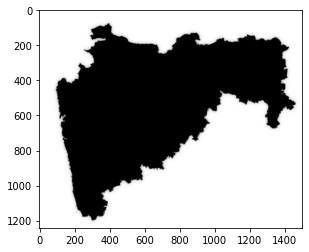

In [21]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
mht=np.array(Image.open(r'./maharashtra-outline-map.png'))
img = Image.fromarray(mht)
img
plt.imshow(mht,interpolation='bilinear')

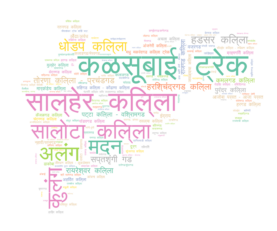

<Figure size 1080x288 with 0 Axes>

In [22]:
wc = WordCloud(font_path=font_path, max_words=200,width = 1500, mode="RGBA", height = 1200, random_state=1, background_color='white', colormap='Set2', collocations=False,mask=mht).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure().set_figwidth(15)
plt.savefig('my_fig123.png', dpi=100 * 10)

In [23]:
import random

def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

<Figure size 24000x12000 with 0 Axes>

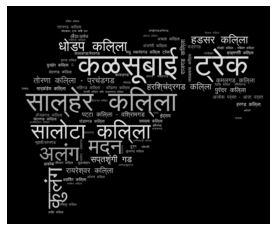

<Figure size 24000x12000 with 0 Axes>

In [24]:
wc = WordCloud(font_path=font_path, max_words=75,width = 1500, mode="RGBA", height = 1200, random_state=1, background_color='black', colormap='Set2', collocations=False,mask=mht).generate_from_frequencies(data)

plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(20, 10), dpi=1200)